In [1]:

!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-20 06:44:19--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  26.8MB/s    in 10s     

2022-05-20 06:44:30 (24.9 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [4]:

!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [6]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("MyFirstEDA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
spark

In [9]:

df = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

In [10]:
df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- adId: integer (nullable = true)
 |-- adCategory: string (nullable = true)



In [11]:
df.show(5)

+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
+-------------------+----+-------------+------+------+----+-----------+
only showing top 5 rows



In [12]:
df.describe()

DataFrame[summary: string, timestamp: string, txId: string, userSessionId: string, teamId: string, userId: string, adId: string, adCategory: string]

In [13]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,16323,None,None,2016-05-26 15:13:22,2016-06-16 11:05:29
txId,16323,24613.82925932733,9513.244787359043,5972,39833
userSessionId,16323,22090.77344850824,8780.27306545314,5649,39623
teamId,16323,70.29492127672609,39.63199500554996,2,179
userId,16323,1187.4641916314404,691.5619445575,1,2387
adId,16323,14.654046437542119,8.623599159144106,0,29
adCategory,16323,None,None,automotive,sports


In [16]:
df2 = df.na.drop(subset=['adId'])

In [17]:
df2.count()

16323

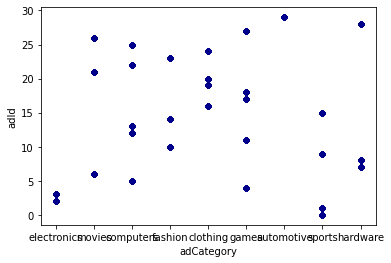

In [19]:
df3 = df2.toPandas()
df3.plot.scatter(x='adCategory', y='adId', c='DarkBlue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f412747fd10>]],
      dtype=object)

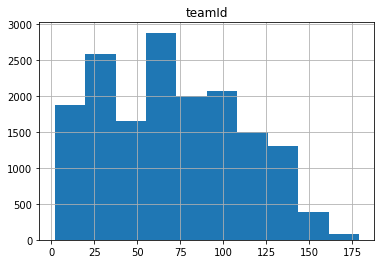

In [23]:
df3.hist(column='teamId', bins=10)